In [1]:
from IPython.display import clear_output
%pip install datasets==2.19.1
%pip install tensorflow==2.15.0
%pip install transformers==4.41.0
%pip install rouge_score
%pip install wandb
clear_output()

In [2]:
import wandb
wandb.login(key="6781743360aedb81523b4e07a9c88a8c6fd4ef17")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import cv2
# import zipfile
# import datasets

# from datasets import Dataset, Features, Array3D, Value



# from transformers import TrOCRProcessor, XLMRobertaTokenizer, TFVisionEncoderDecoderModel, AutoModelForCausalLM, XLMRobertaForCausalLM, VisionEncoderDecoderConfig, VisionEncoderDecoderModel
# from transformers import create_optimizer
# from transformers import AdamW

# import tensorflow as tf
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, EarlyStopping 
# from keras.losses import SparseCategoricalCrossentropy, Reduction
# from keras.optimizers import Adam

# tf.keras.backend.clear_session()

# processor_checkpoint = "microsoft/trocr-base-handwritten"
# # tokenizer_checkpoint = "FacebookAI/xlm-roberta-base"
# tokenizer_checkpoint = "xlm-roberta-base"
# tokenizer = XLMRobertaTokenizer.from_pretrained(tokenizer_checkpoint, force_download=True)
# processor = TrOCRProcessor.from_pretrained(processor_checkpoint, force_download=True)

# def transform_image(image):
#     image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
#     return image

# def process_data(batch):
#     images = [np.asarray(image) for image in batch['image']]
#     # pixel_values = processor(images, return_tensors="tf", do_rescale=False, do_normalize=False).pixel_values
#     encoded_images = processor(images, do_rescale=False, return_tensors="tf")
#     encoded_labels = tokenizer(batch['label'], padding="max_length", truncation=True, max_length=10, return_tensors="tf")
#     return {
#         "pixel_values": encoded_images['pixel_values'],
#         "decoder_input_ids": encoded_labels['input_ids'],
#         "labels": encoded_labels['input_ids']}
# clear_output()

In [4]:
# # read image
# print("-----START TO READ IMAGES-----")
# image_path = "/kaggle/input/cropped-images-boc-00-cleaned/cropped_images_boc_00_cleaned"
# files = os.listdir(image_path)
# images = np.asarray([cv2.cvtColor(plt.imread(os.path.join(image_path, file)), cv2.COLOR_RGB2BGR) for file in files], dtype="object")
# image_names = np.asarray([os.path.splitext(file)[0].split(" ")[0] for file in files], dtype="object")

In [5]:
# # apply image augmentation
# print("-----START TO AUGMENT IMAGES-----")
# new_images = []
# new_image_names = []
# idx = 0
# datagen = ImageDataGenerator(rotation_range=10, shear_range=0.8, zoom_range=0.1, fill_mode='nearest')
# for image in images:
#     new_images.append(image)
#     new_image_names.append(image_names[idx])
#     raw_img = np.expand_dims(image, axis=0)
#     aug_iter = datagen.flow(raw_img, batch_size=1)
#     for i in range(9):
#         augmented_images = next(aug_iter)
#         augmented_bgr_image = augmented_images[0].astype(np.uint8)
#         new_images.append(augmented_bgr_image)
#         new_image_names.append(image_names[idx])
#     idx = idx+1
# new_images = np.asarray(new_images, dtype="object")
# new_images = np.asarray([transform_image(image) for image in new_images], dtype="float32")
# new_image_names = np.asarray(new_image_names, dtype="object")

In [6]:
# # convert data to Huggingface dataset
# print("-----START TO CONVERT TO HUGGINGFACE DATASET OBJECT-----")
# features = Features({
#     'image': Array3D(dtype="float32", shape=(224, 224, 3)),
#     'label': Value(dtype="string")})
# data = [{'image': image, 'label': label} for image, label in zip(new_images, new_image_names)]
# dataset = Dataset.from_list(data, features=features)

In [7]:
# dataset

In [8]:
# # convert to TensorFlow dataset
# print("-----START TO CONVERT TO TENSORFLOW DATASET OBJECT-----")
# dataset = dataset.map(process_data, batched=True, batch_size=32, remove_columns=['image', 'label'])
# dataset.set_format(type="tensorflow", columns=["pixel_values", "decoder_input_ids", "labels"])
# dataset = dataset.train_test_split(test_size=0.1, shuffle=True)
# train_dataset = dataset['train'].to_tf_dataset(
#     columns=['pixel_values', 'decoder_input_ids'],
#     label_cols='labels',
#     batch_size=4,
#     shuffle=True
# )
# test_dataset = dataset['test'].to_tf_dataset(
#     columns=['pixel_values', 'decoder_input_ids'],
#     label_cols='labels',
#     batch_size=4,
#     shuffle=True
# )

In [9]:
# # construct_model
# from keras.optimizers import Adam
# print("-----START TO CONSTRUCT THE MODEL-----")
# config_encoder = VisionEncoderDecoderConfig.from_pretrained(processor_checkpoint).encoder
# config_decoder = XLMRobertaForCausalLM.from_pretrained(tokenizer_checkpoint, is_decoder=True).config
# config = VisionEncoderDecoderConfig.from_encoder_decoder_configs(config_encoder, config_decoder)
# model = TFVisionEncoderDecoderModel(config)
# model.build()
# # model.config.decoder_start_token_id = tokenizer.cls_token_id
# # model.config.pad_token_id = tokenizer.pad_token_id
# # model.config.vocab_size = model.config.decoder.vocab_size
# clear_output()

In [10]:
# init_lr = 5e-5 
# num_epoch = 50
# num_train_steps = len(train_dataset) * num_epoch
# optimizer, lr_schedule = create_optimizer(init_lr=init_lr, num_train_steps=num_train_steps, num_warmup_steps=100)
# model.compile(optimizer=optimizer, loss=model.hf_compute_loss)
# model.summary()

In [11]:
# if not os.path.exists("/kaggle/working/tmp"):
#     os.makedirs("/kaggle/working/tmp")
#     os.makedirs("/kaggle/working/tmp/ckpt")
# checkpoint_filepath = '/kaggle/working/tmp/ckpt/checkpoint.weights.h5'
# model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=1)
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# history = model.fit(train_dataset, validation_data=test_dataset, epochs=num_epoch, verbose=1, callbacks=[model_checkpoint_callback, early_stopping_callback])

In [12]:
# if not os.path.exists("/kaggle/working/fine_tunned_model"):
#     os.makedirs("/kaggle/working/fine_tunned_model")
# model.save_pretrained("/kaggle/working/fine_tunned_model")
# processor.save_pretrained("/kaggle/working/fine_tunned_model")
# tokenizer.save_pretrained("/kaggle/working/fine_tunned_model")
# def zipdir(path, ziph):
#     # ziph is zipfile handle
#     for root, dirs, files in os.walk(path):
#         for file in files:
#             ziph.write(os.path.join(root, file), 
#                        os.path.relpath(os.path.join(root, file), 
#                                        os.path.join(path, '..')))
# with zipfile.ZipFile('fine_tunned_model.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
#     zipdir('/kaggle/working/fine_tunned_model', zipf)

In [13]:
# print(history)

In [14]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rouge_score
import datasets

from sklearn.model_selection import train_test_split
from torch.utils.data.dataset import Dataset as D

from transformers import ViTFeatureExtractor, XLMRobertaTokenizer
from transformers import VisionEncoderDecoderModel, XLMRobertaForMaskedLM, XLMRobertaForCausalLM
from transformers import VisionEncoderDecoderConfig
from transformers import DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import default_data_collator
from keras.preprocessing.image import ImageDataGenerator


processor_checkpoint = "microsoft/trocr-base-handwritten"
tokenizer_checkpoint = "xlm-roberta-base"

feature_extractor = ViTFeatureExtractor.from_pretrained(processor_checkpoint)
tokenizer = XLMRobertaTokenizer.from_pretrained(tokenizer_checkpoint)

def transform_image(image):
    image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
    return image
clear_output()

In [15]:
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [16]:
# read image
print("-----START TO READ IMAGES-----")
image_path = "/kaggle/input/cropped-images-boc-00-cleaned/cropped_images_boc_00_cleaned"
files = os.listdir(image_path)
images = np.asarray([cv2.cvtColor(plt.imread(os.path.join(image_path, file)), cv2.COLOR_RGB2BGR) for file in files], dtype="object")
image_names = np.asarray([os.path.splitext(file)[0].split(" ")[0] for file in files], dtype="object")

-----START TO READ IMAGES-----


In [17]:
# apply image augmentation
print("-----START TO AUGMENT IMAGES-----")
new_images = []
new_image_names = []
idx = 0
datagen = ImageDataGenerator(rotation_range=10, shear_range=0.8, zoom_range=0.1, fill_mode='nearest')
for image in images:
    new_images.append(image)
    new_image_names.append(image_names[idx])
    raw_img = np.expand_dims(image, axis=0)
    aug_iter = datagen.flow(raw_img, batch_size=1)
    for i in range(9):
        augmented_images = next(aug_iter)
        augmented_bgr_image = augmented_images[0].astype(np.uint8)
        new_images.append(augmented_bgr_image)
        new_image_names.append(image_names[idx])
    idx = idx+1
new_images = np.asarray(new_images, dtype="object")
new_images = np.asarray([transform_image(image) for image in new_images], dtype="float32")
new_image_names = np.asarray(new_image_names, dtype="object")

-----START TO AUGMENT IMAGES-----


In [18]:
image_shape = new_images[0].shape
df = pd.DataFrame({
    'label': new_image_names,
    'image': [image.flatten() for image in new_images],
})
df.head()

,label,image
0,វិញ្ញាបនបត្រ,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,វិញ្ញាបនបត្រ,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,វិញ្ញាបនបត្រ,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,វិញ្ញាបនបត្រ,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,វិញ្ញាបនបត្រ,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)
# train_df.reset_index().drop("index", axis=1, inplace=True)
# test_df.reset_index().drop("index", axis=1, inplace=True)
train_df = pd.DataFrame({
    'image': X_train,
    'label': y_train
}).reset_index().drop("index", axis=1)
test_df = pd.DataFrame({
    'image': X_test,
    'label': y_test
}).reset_index().drop("index", axis=1)

In [20]:
# set encoder decoder tying to True
config_encoder = VisionEncoderDecoderConfig.from_pretrained(processor_checkpoint, force_download=True).encoder
config_decoder = XLMRobertaForCausalLM.from_pretrained(tokenizer_checkpoint, is_decoder=True, force_download=True).config
config = VisionEncoderDecoderConfig.from_encoder_decoder_configs(config_encoder, config_decoder, tie_encoder_decoder=True)
model = VisionEncoderDecoderModel(config)
model.to(device)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_fea

In [21]:
print(model.config)

VisionEncoderDecoderConfig {
  "decoder": {
    "_name_or_path": "xlm-roberta-base",
    "add_cross_attention": true,
    "architectures": [
      "XLMRobertaForMaskedLM"
    ],
    "attention_probs_dropout_prob": 0.1,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": 0,
    "chunk_size_feed_forward": 0,
    "classifier_dropout": null,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": null,
    "diversity_penalty": 0.0,
    "do_sample": false,
    "early_stopping": false,
    "encoder_no_repeat_ngram_size": 0,
    "eos_token_id": 2,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bos_token_id": null,
    "forced_eos_token_id": null,
    "hidden_act": "gelu",
    "hidden_dropout_prob": 0.1,
    "hidden_size": 768,
    "id2label": {
      "0": "LABEL_0",
      "1": "LABEL_1"
    },
    "initializer_range": 0.02,
    "intermediate_size": 3072,
    "is_decoder": true,
    "is_encoder_decoder": false

In [22]:
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = tokenizer.sep_token_id
model.config.max_length = 20
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

In [23]:
batch_size = 8
max_length = 10
class KhmerTextImageDataset(D):
    def __init__(self, df, tokenizer, feature_extractor, image_shape, decoder_max_length=max_length):
        self.df = df
        self.tokenizer = tokenizer
        self.feature_extractor = feature_extractor
        self.decoder_max_length = decoder_max_length
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        label = self.df['label'][idx]
        image = self.df['image'][idx].reshape(image_shape)
        pixel_values = self.feature_extractor(image, do_rescale=False, return_tensors="pt").pixel_values
        labels = self.tokenizer(label, 
                                truncation = True,
                                padding="max_length", 
                                max_length=self.decoder_max_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.tokenizer.pad_token_id else -100 for label in labels]
        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding
train_dataset = KhmerTextImageDataset(train_df,
                                      tokenizer=tokenizer,
                                      feature_extractor= feature_extractor,
                                      image_shape=image_shape
                                      )
eval_dataset = KhmerTextImageDataset(test_df,
                                     tokenizer=tokenizer,
                                     feature_extractor= feature_extractor,
                                     image_shape=image_shape)

In [24]:
rouge = datasets.load_metric("rouge", trust_remote_code=True)
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    # all unnecessary tokens are removed
    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)
    rouge_output = rouge.compute(predictions=pred_str, references=label_str, rouge_types=["rouge2"])["rouge2"].mid

    return {
        "rouge2_precision": round(rouge_output.precision, 4),
        "rouge2_recall": round(rouge_output.recall, 4),
        "rouge2_fmeasure": round(rouge_output.fmeasure, 4),
    }

/tmp/ipykernel_26/329523332.py:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge = datasets.load_metric("rouge", trust_remote_code=True)


In [25]:
KhmerOCRModel = "/kaggle/working/KhmerOCRModel"
training_epochs = 15

if not os.path.exists(KhmerOCRModel):
    os.makedirs(KhmerOCRModel)
training_args = Seq2SeqTrainingArguments(
    output_dir=KhmerOCRModel,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    predict_with_generate=True,
    fp16=True,
    eval_strategy="epoch",
    do_train=True,
    do_eval=True,
    logging_steps=1024,  
    save_steps=2048, 
    warmup_steps=1024,  
    num_train_epochs = training_epochs,
    overwrite_output_dir=True,
    save_total_limit=1,
)

trainer = Seq2SeqTrainer(
    tokenizer=feature_extractor,
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)

# Fine-tune the model, training and evaluating on the train dataset trainer.train()
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: channudam-2002 (rayranger). Use `wandb login --relogin` to force relogin
wandb: wandb version 0.17.0 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Tracking run with wandb version 0.16.6
wandb: Run data is saved locally in /kaggle/working/wandb/run-20240524_093424-qbekh3pw
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run /kaggle/working/KhmerOCRModel
wandb: ⭐️ View project at https://wandb.ai/rayranger/huggingface
wandb: 🚀 View run at https://wandb.ai/rayranger/huggingface/runs/qbekh3pw
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strat

Epoch,Training Loss,Validation Loss,Rouge2 Precision,Rouge2 Recall,Rouge2 Fmeasure
1,No log,4.139349,0.000000,0.000000,0.000000
2,No log,1.715686,0.000000,0.000000,0.000000
3,No log,0.753586,0.000000,0.000000,0.000000
4,No log,0.601385,0.000000,0.000000,0.000000
5,2.651400,0.546843,0.000000,0.000000,0.000000
6,2.651400,0.522894,0.000000,0.000000,0.000000
7,2.651400,0.491777,0.000000,0.000000,0.000000
8,2.651400,0.473207,0.000000,0.000000,0.000000
9,2.651400,0.430180,0.000000,0.000000,0.000000
10,0.469900,0.357147,0.000000,0.000000,0.000000


/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1283: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/transformers/generation/utils.py:1168: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an 

TrainOutput(global_step=3240, training_loss=1.0812296054981374, metrics={'train_runtime': 3231.2511, 'train_samples_per_second': 8.022, 'train_steps_per_second': 1.003, 'total_flos': 1.3822598740684308e+19, 'train_loss': 1.0812296054981374, 'epoch': 15.0})

In [26]:
import zipfile
trainer.save_model(KhmerOCRModel)
feature_extractor.save_pretrained(KhmerOCRModel)
tokenizer.save_pretrained(KhmerOCRModel)
def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file), 
                       os.path.relpath(os.path.join(root, file), 
                                       os.path.join(path, '..')))
with zipfile.ZipFile('KhmerOCRModel.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipdir('/kaggle/working/KhmerOCRModel', zipf)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}


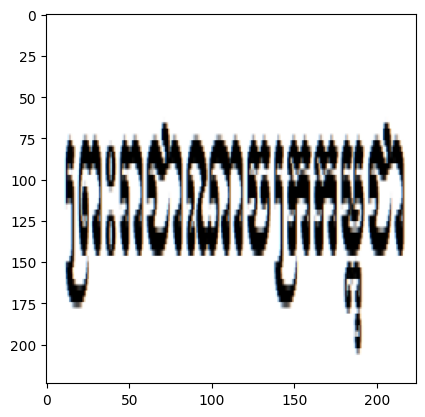

In [27]:
image = cv2.cvtColor(plt.imread("/kaggle/input/ocr-test-data/Screenshot 2024-05-24 155106.png"), cv2.COLOR_RGB2BGR)
image = cv2.resize(image, (224, 224), interpolation = cv2.INTER_AREA)
plt.imshow(image)
plt.show()

In [28]:
model = VisionEncoderDecoderModel.from_pretrained("/kaggle/working/KhmerOCRModel")
# print(tokenizer.batch_decode(encoded_label, skip_special_tokens=True))

The following encoder weights were not tied to the decoder ['vision_encoder_decoder/embeddings', 'vision_encoder_decoder/pooler', 'vision_encoder_decoder/encoder', 'vision_encoder_decoder/layernorm']
The following encoder weights were not tied to the decoder ['vision_encoder_decoder/embeddings', 'vision_encoder_decoder/pooler', 'vision_encoder_decoder/encoder', 'vision_encoder_decoder/layernorm']
The following encoder weights were not tied to the decoder ['vision_encoder_decoder/embeddings', 'vision_encoder_decoder/pooler', 'vision_encoder_decoder/encoder', 'vision_encoder_decoder/layernorm']


In [29]:
pixel_values = feature_extractor(image, do_rescale=False, return_tensors="pt").pixel_values
generated_id = model.generate(pixel_values=pixel_values, max_length=10)
encoded_label = tokenizer('ព្រះរាជាណាចក្រកម្ពុជា', return_tensors="pt", padding="max_length", truncation=True, max_length=10).input_ids
loss = model(pixel_values=pixel_values, labels=encoded_label).loss
text = tokenizer.batch_decode(generated_id, skip_special_tokens=True)
print(text)
print(loss)

['ព្រះរាជាណាចក្រកម្ពុជា']
tensor(10.2158, grad_fn=<NllLossBackward0>)
